## Prepare Raster Data

In [2]:
import arcpy
import os
import geopandas as gpd

arcpy.env.workspace = r"E:/Temp"
outputWorkspace = r"E:/Temp/output"
clipShapes = gpd.read_file(r"C:/Users/Tristan/Desktop/parlapgrids/grids5k_extract.shp")

# Convert the GeoDataFrame to a shapefile
clipShapes_fc = os.path.join(arcpy.env.workspace, "clipShapes.shp")
clipShapes.to_file(clipShapes_fc)
folder = "C:/Users/Tristan/Desktop/parlap mosaics/"


#for every file in folder with the name "forest" in it and the pattern .tif, read it in and add it to a list including the year in the name
forest_files = [f for f in os.listdir(folder) if "forest" in f and ".tif" in f] 
forest_files.sort()

#remove all files from forest_list with .aux, .vat, .xml in them
forest_files = [f for f in forest_files if ".aux" not in f and ".vat" not in f and ".xml" not in f]

#remove all files from forest_list with _de in them
forest_files = [f for f in forest_files if "_de" not in f]
forest_files.sort()

forest_files.sort()

#make the agglosID column into text format rather than numeric
clipShapes['gridID'] = clipShapes['gridID'].astype(str)

# Get the unique values from the 'agglosID' field
clipShapes_ids = set(clipShapes['gridID'])

# Create a list of raster objects
raster_list = [arcpy.Raster(os.path.join(folder, raster)) for raster in forest_files]

#drop all files from raster list that contain the text .ovr in them
raster_list = [r for r in raster_list if ".ovr" not in str(r)]

In [3]:
#print the raster_list items
print(raster_list)

[C:/Users/Tristan/Desktop/parlap mosaics/kimsa_1984_forest.tif, C:/Users/Tristan/Desktop/parlap mosaics/kimsa_1984_forest.tif.ovr, C:/Users/Tristan/Desktop/parlap mosaics/kimsa_1993_forest.tif, C:/Users/Tristan/Desktop/parlap mosaics/kimsa_1993_forest.tif.ovr, C:/Users/Tristan/Desktop/parlap mosaics/kimsa_2007_forest.tif, C:/Users/Tristan/Desktop/parlap mosaics/kimsa_2007_forest.tif.ovr, C:/Users/Tristan/Desktop/parlap mosaics/kimsa_2014_forest.tif, C:/Users/Tristan/Desktop/parlap mosaics/kimsa_2014_forest.tif.ovr, C:/Users/Tristan/Desktop/parlap mosaics/kimsa_2019_forest.tif, C:/Users/Tristan/Desktop/parlap mosaics/kimsa_2019_forest.tif.ovr]


In [4]:
import arcpy
import geopandas as gpd

clipShapes = gpd.read_file(r"C:/Users/Tristan/Desktop/parlapgrids/grids5k_extract.shp")

# Print the CRS of clipShapes
print("CRS of clipShapes:")
print(clipShapes.crs)

# Get the CRS of the first raster in the list
raster = raster_list[0]  # Assuming the raster_list is already defined
desc = arcpy.Describe(raster)
raster_crs = desc.spatialReference

# Print the CRS details of the first raster
print("CRS of the first raster:")
print(raster_crs.exportToString())


CRS of clipShapes:
EPSG:4326
CRS of the first raster:
GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]];-400 -400 11258999068426.2;-100000 10000;-100000 10000;8.98315284119521E-09;0.001;0.001;IsHighPrecision


Ensure the CRS of the raster and the clipshapes are the same

In [5]:
import os
import re
import pyproj
import geopandas as gpd
import rasterio
from rasterio.mask import mask

# Define the file path of the first raster
#first_raster_path = "E:/World Bank/forobs/forobs/mosaics/jrctmf_2009_forest.tif" #keeping this here to remind me of the desired filename. The name matters because we look for only 1 year as a 4 digit number and the text _forest
first_raster_path = "C:/Users/Tristan/Desktop/parlap mosaics/kimsa_1984_forest.tif" #replace this with one of your rasters of interest to get the appropriate CRS. 
# Open the raster file and retrieve the CRS
with rasterio.open(first_raster_path) as src:
    raster_crs = src.crs

# Create a pyproj Transformer object for the transformation
transformer = pyproj.Transformer.from_crs("EPSG:4326", raster_crs, always_xy=True)

# Project clipShapes to match the CRS of the raster
clipShapes_projected = clipShapes.to_crs(raster_crs)

# Convert the projected GeoDataFrame to a shapefile
clipShapes_fc = os.path.join(arcpy.env.workspace, "clipShapes.shp")
clipShapes_projected.to_file(clipShapes_fc)

# Print the CRS of clipShapes and the first raster
print("CRS of clipShapes:")
print(clipShapes.crs)
print("CRS of the first raster:")
print(raster_crs)


CRS of clipShapes:
EPSG:4326
CRS of the first raster:
EPSG:4326


Export the projected clipshapes as a shapefile and use that later for clipping the rasters in the list

In [6]:
# Define the output file path
output_shapefile = "C:/Users/Tristan/Desktop/parlapgrids/clipShapes_projected.shp"

# Export the clipShapes_projected GeoDataFrame to a shapefile
clipShapes_projected.to_file(output_shapefile)

print("clipShapes_projected exported as a shapefile.")


clipShapes_projected exported as a shapefile.


Move files code, only necessary if you only partially complete the clip + export for loop

In [ ]:
import os
import shutil

source_dir = r"C:/Users/Tristan/Desktop/clipped/"
target_dir = r"C:/Users/Tristan/Desktop/clipped2007_2021/"

# Get a list of all files in the source directory
file_list = os.listdir(source_dir)

# Iterate over each file in the list
for file_name in file_list:
    # Check if the file name contains any of the specified strings
    if "0_2007" in file_name or "0_2008" in file_name or "0_2009" in file_name or "0_2010" in file_name or "0_2011" in file_name or "0_2012" in file_name or "0_2013" in file_name or "0_2014" in file_name or "0_2015" in file_name or "0_2016" in file_name or "0_2017" in file_name or "0_2018" in file_name or "0_2019" in file_name or "0_2020" in file_name or "0_2021" in file_name:
        # Create the full path of the source file
        source_file = os.path.join(source_dir, file_name)
        # Create the full path of the target file
        target_file = os.path.join(target_dir, file_name)
        
        # Check if the file already exists in the target directory
        if os.path.exists(target_file):
            print(f"File '{file_name}' already exists in the target directory. Skipping...")
        else:
            # Move the file to the target directory
            shutil.move(source_file, target_file)
            print(f"Moved file: {file_name}")

print("Files moved.")


In [ ]:
import os
import shutil

source_dir = r"C:/Users/Tristan/Desktop/clipped6/"
target_dir = r"C:/Users/Tristan/Desktop/clipped2007_2021/"

# Get a list of all files in the source directory
file_list = os.listdir(source_dir)

# Iterate over each file in the list
for file_name in file_list:
    # Check if the file name contains any of the specified strings
    if "0_2007" in file_name or "0_2008" in file_name or "0_2009" in file_name or "0_2010" in file_name or "0_2011" in file_name or "0_2012" in file_name or "0_2013" in file_name or "0_2014" in file_name or "0_2015" in file_name or "0_2016" in file_name or "0_2017" in file_name or "0_2018" in file_name or "0_2019" in file_name or "0_2020" in file_name or "0_2021" in file_name:
        # Create the full path of the source file
        source_file = os.path.join(source_dir, file_name)
        # Create the full path of the target file
        target_file = os.path.join(target_dir, file_name)
        
        # Check if the file already exists in the target directory
        if os.path.exists(target_file):
            print(f"File '{file_name}' already exists in the target directory. Skipping...")
        else:
            # Move the file to the target directory
            shutil.move(source_file, target_file)
            print(f"Moved file: {file_name}")

print("Files moved.")


## Clip Rasters

In [11]:
import os
import re
import arcpy

# Set the workspace environment for arcpy
arcpy.env.workspace = "C:/Users/Tristan/Desktop/temp/"

# Define the folder to save the clipped rasters
output_folder = "C:/Users/Tristan/Desktop/parlap 5k clipped/"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Path to the projected shapefile
clipShapes_projected_path = "C:/Users/Tristan/Desktop/parlapgrids/5k projected/clipShapes_projected.shp"

# Get the total number of raster files
total_files = len(raster_list)

# Loop over each raster and clip using ExtractByMask
for i, raster in enumerate(raster_list, 1):
    filename = os.path.basename(raster.catalogPath)  # Get the filename from the raster path
    year_match = re.search(r"\d{4}", filename)  # Extract the 4-digit year from the filename
    
    # Loop over each feature in clipShapes_projected
    with arcpy.da.SearchCursor(clipShapes_projected_path, ["SHAPE@", "gridID"]) as cursor:
        for row in cursor:
            # Clip the raster using the current feature in clipShapes_projected
            agglosID = int(row[1])  # Convert the agglosID to an integer 
            output_filename = f"clipped_{row[1]}_{year_match.group(0)}.tif"
            output_path = os.path.join(output_folder, output_filename)
            
            # Check if the file already exists in the output folder
            if os.path.exists(output_path):
                print(f"Skipped: {output_filename} (File already exists)")
            else:
                arcpy.Clip_management(raster.catalogPath, "#", output_path, row[0], "#", "ClippingGeometry")
                print(f"Raster clipped: {output_filename}")
                
    print(f"Progress: {i}/{total_files} files")

print("Clipping complete.")


Raster clipped: clipped_161.0_1984.tif
Raster clipped: clipped_162.0_1984.tif
Raster clipped: clipped_163.0_1984.tif
Raster clipped: clipped_164.0_1984.tif
Raster clipped: clipped_165.0_1984.tif
Raster clipped: clipped_166.0_1984.tif
Raster clipped: clipped_342.0_1984.tif
Raster clipped: clipped_343.0_1984.tif
Raster clipped: clipped_344.0_1984.tif
Raster clipped: clipped_345.0_1984.tif
Raster clipped: clipped_346.0_1984.tif
Raster clipped: clipped_347.0_1984.tif
Raster clipped: clipped_348.0_1984.tif
Raster clipped: clipped_349.0_1984.tif
Raster clipped: clipped_350.0_1984.tif
Raster clipped: clipped_351.0_1984.tif
Raster clipped: clipped_352.0_1984.tif
Raster clipped: clipped_523.0_1984.tif
Raster clipped: clipped_524.0_1984.tif
Raster clipped: clipped_525.0_1984.tif
Raster clipped: clipped_526.0_1984.tif
Raster clipped: clipped_527.0_1984.tif
Raster clipped: clipped_528.0_1984.tif
Raster clipped: clipped_529.0_1984.tif
Raster clipped: clipped_530.0_1984.tif
Raster clipped: clipped_5

In [60]:
#original raster clip code

import os
import re
import arcpy

# Set the workspace environment for arcpy
arcpy.env.workspace = "E:/World Bank/forobs/forobs/mosaics/"

# Define the folder to save the clipped rasters
output_folder = "C:/Users/Tristan/Desktop/clipped/"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Path to the projected shapefile
clipShapes_projected_path = "E:/World Bank/forobs/forobs/mosaics/clipShapes_projected.shp"

# Loop over each raster and clip using ExtractByMask
for raster in raster_list:
    filename = os.path.basename(raster.catalogPath)  # Get the filename from the raster path
    year_match = re.search(r"\d{4}", filename)  # Extract the 4-digit year from the filename
    
    # Loop over each feature in clipShapes_projected
    with arcpy.da.SearchCursor(clipShapes_projected_path, ["SHAPE@", "agglosID"]) as cursor:
        for row in cursor:
            # Clip the raster using the current feature in clipShapes_projected
            agglosID = int(row[1])  # Convert the agglosID to an integer 
            output_filename = f"clipped_{row[1]}_{year_match.group(0)}.tif"
            output_path = os.path.join(output_folder, output_filename)
            
            arcpy.Clip_management(raster.catalogPath, "#", output_path, row[0], "#", "ClippingGeometry")
            print(f"Raster clipped: {output_filename}")
                
print("Clipping complete.")

NameError: name 'raster_list' is not defined

## Fragmentation Analysis

https://pylandstats.readthedocs.io/en/latest/landscape.html

Processing Time Check for each of the Landscape Metrics

In [13]:
import os
import rasterio
import numpy as np
import time
from pylandstats import Landscape

# Define the folder path containing the raster files
folder_path = "C:/Users/Tristan/Desktop/parlap 5k clipped/"

# Get a list of raster files in the folder
raster_files = [file for file in os.listdir(folder_path) if file.endswith(".tif")]

# Select the first raster file
raster_file = raster_files[0]

# Open the raster file using rasterio
raster_path = os.path.join(folder_path, raster_file)
with rasterio.open(raster_path) as dataset:
    # Read the raster data and convert it to a NumPy array
    raster_data = dataset.read(1)
    raster_data = np.array(raster_data)

    # Get the resolution (pixel size) of the raster
    res = dataset.res

# Create a Landscape object from the raster data
landscape = Landscape(raster_data, res=res)

# Define a list of metric names
metric_names = [
    "Edge Density",
    "Number of Patches",
    "Patch Density",
    "Largest Patch Index",
    "Fractal Dimension",
    "Euclidean Nearest Neighbor"
]

# Run each metric separately and measure the processing time
for metric_name in metric_names:
    start_time = time.time()
    if metric_name == "Edge Density":
        metric_value = landscape.edge_density()
    elif metric_name == "Number of Patches":
        metric_value = landscape.number_of_patches()
    elif metric_name == "Patch Density":
        metric_value = landscape.patch_density()
    elif metric_name == "Largest Patch Index":
        metric_value = landscape.largest_patch_index()
    elif metric_name == "Fractal Dimension":
        metric_value = landscape.fractal_dimension()
    elif metric_name == "Euclidean Nearest Neighbor":
        metric_value = landscape.euclidean_nearest_neighbor()
    else:
        metric_value = None

    end_time = time.time()
    processing_time = end_time - start_time

    print(f"Metric: {metric_name}")
    print(f"Value: {metric_value}")
    print(f"Processing Time: {processing_time:.4f} seconds")
    print("---------------------------")


Metric: Edge Density
Value: 12373.027762306312
Processing Time: 24.3389 seconds
---------------------------
Metric: Number of Patches
Value: 1140
Processing Time: 0.0080 seconds
---------------------------
Metric: Patch Density
Value: 90240771901.2032
Processing Time: 0.0000 seconds
---------------------------
Metric: Largest Patch Index
Value: 78.07819892952207
Processing Time: 0.0180 seconds
---------------------------
Metric: Fractal Dimension
Value:          class_val  fractal_dimension
0     3.631367e-07           0.960361
1     7.262733e-08           1.000000
2     1.452547e-07           0.992519
3     1.452547e-07           0.992519
4     7.262733e-08           1.000000
...            ...                ...
1135  1.452547e-07           0.955976
1136  7.262733e-08           1.000000
1137  7.262733e-08           1.000000
1138  9.863518e-03           0.436689
1139  2.333226e-03           0.718986

[1140 rows x 2 columns]
Processing Time: 0.0967 seconds
---------------------------
M

Long version (36 hours, with shape complexity index) for both year folders: 

In [ ]:
import os
import pandas as pd
import rasterio
import numpy as np
from pylandstats import Landscape

# Define the folder path containing the raster files
folder_path = "C:/Users/Tristan/Desktop/clipped_sample/"

# Get a list of raster files in the folder
raster_files = [file for file in os.listdir(folder_path) if file.endswith(".tif")]

# Create empty lists to store the results
agglosIDs = []
years = []
num_patches = []
patch_densities = []
largest_patch_indices = []
core_area_percentages = []
landscape_division_indices = []
aggregation_indices = []
shape_complexity_indices = []

# Loop through the raster files in the folder
for raster_file in raster_files:
    # Extract the agglosID and year from the file name
    parts = raster_file.split("_")
    agglosID = parts[1]
    year = int(parts[2].split(".")[0])

    # Open the raster file using rasterio
    raster_path = os.path.join(folder_path, raster_file)
    with rasterio.open(raster_path) as dataset:
        # Read the raster data and convert it to a NumPy array
        raster_data = dataset.read(1)
        raster_data = np.array(raster_data)

        # Get the resolution (pixel size) of the raster
        res = dataset.res

    # Create a Landscape object from the raster data
    landscape = Landscape(raster_data, res=res)

    # Calculate the landscape metrics
    number_of_patches = landscape.number_of_patches()
    patch_density = landscape.patch_density()
    largest_patch_index = landscape.largest_patch_index()

    # Calculate the core area as the area of the largest forest patch
    core_area = landscape.area(class_val=1).max()

    # Calculate the core area percentage
    core_area_percentage = (core_area / np.sum(raster_data)) * 100

    # Calculate the Landscape Division Index
    landscape_division_index = largest_patch_index / np.sqrt(number_of_patches)

    # Calculate the Aggregation Index
    aggregation_index = (number_of_patches - 1) / largest_patch_index

    # Calculate the Shape Complexity Index (Perimeter-Area Ratio)
    shape_complexity_index = landscape.perimeter_area_ratio()

    # Append the results to the lists
    agglosIDs.append(agglosID)
    years.append(year)
    num_patches.append(number_of_patches)
    patch_densities.append(patch_density)
    largest_patch_indices.append(largest_patch_index)
    core_area_percentages.append(core_area_percentage)
    landscape_division_indices.append(landscape_division_index)
    aggregation_indices.append(aggregation_index)
    shape_complexity_indices.append(shape_complexity_index)

# Create a dataframe from the results
result_df = pd.DataFrame({
    "agglosID": agglosIDs,
    "year": years,
    "Number_of_patches": num_patches,
    "Patch_density": patch_densities,
    "Largest_patch_index": largest_patch_indices,
    "Core_area_percentage": core_area_percentages,
    "Landscape_division_index": landscape_division_indices,
    "Aggregation_index": aggregation_indices,
    "ShaCode thatjhad pe_complexity_index": shape_complexity_indices
})

# Sort the dataframe by agglosID and year in ascending order
result_df = result_df.sort_values(by=["agglosID", "year"])

# Reset the index
result_df = result_df.reset_index(drop=True)

# Print the resulting dataframe
print(result_df)


Code that has the nparray check for forest class

In [16]:
import os
import pandas as pd
import rasterio
import numpy as np
from pylandstats import Landscape

# Define the folder path containing the raster files
folder_path = "C:/Users/Tristan/Desktop/parlap 5k clipped/"

# Get a list of raster files in the folder
raster_files = [file for file in os.listdir(folder_path) if file.endswith(".tif")]

# Create empty lists to store the results
gridIDs = []
years = []
num_patches = []
patch_densities = []
largest_patch_indices = []
core_area_percentages = []
landscape_division_indices = []
aggregation_indices = []

# Loop through the raster files in the folder
for raster_file in raster_files:
    # Extract the gridID and year from the file name
    parts = raster_file.split("_")
    gridID = parts[1]
    year = int(parts[2].split(".")[0])

    # Open the raster file using rasterio
    raster_path = os.path.join(folder_path, raster_file)
    with rasterio.open(raster_path) as dataset:
        # Read the raster data and convert it to a NumPy array
        raster_data = dataset.read(1)
        raster_data = np.array(raster_data)

        # Filter the raster data to only include forest (2) values
        filtered_data = np.where(raster_data == 2, 2, 0)

        # Get the resolution (pixel size) of the raster
        res = dataset.res

    # Create a Landscape object from the filtered raster data
    landscape = Landscape(filtered_data, res=res)

    # Calculate the landscape metrics
    number_of_patches = landscape.number_of_patches()
    patch_density = landscape.patch_density()

    # Calculate the largest patch index manually
    labels, counts = np.unique(filtered_data, return_counts=True)
    largest_patch_index = np.max(counts) / np.sum(filtered_data == 2)

    # Calculate the core area as the area of the largest forest patch
    core_area = np.max(counts)

    # Calculate the core area percentage
    core_area_percentage = (core_area / np.sum(filtered_data)) * 100

    # Calculate the Landscape Division Index
    landscape_division_index = largest_patch_index / np.sqrt(number_of_patches)

    # Calculate the Aggregation Index
    aggregation_index = (number_of_patches - 1) / largest_patch_index

    # Append the results to the lists
    gridIDs.append(gridID)
    years.append(year)
    num_patches.append(number_of_patches)
    patch_densities.append(patch_density)
    largest_patch_indices.append(largest_patch_index)
    core_area_percentages.append(core_area_percentage)
    landscape_division_indices.append(landscape_division_index)
    aggregation_indices.append(aggregation_index)

# Create a dataframe from the results
result_df2 = pd.DataFrame({
    "gridID": gridIDs,
    "year": years,
    "Number_of_patches": num_patches,
    "Patch_density": patch_densities,
    "Largest_patch_index": largest_patch_indices,
    "Core_area_percentage": core_area_percentages,
    "Landscape_division_index": landscape_division_indices,
    "Aggregation_index": aggregation_indices
})

# Sort the dataframe by gridID and year in ascending order
result_df2 = result_df2.sort_values(by=["gridID", "year"])

# Reset the index
result_df2 = result_df2.reset_index(drop=True)

# Print the resulting dataframe
print(result_df2)


C:\Users\Tristan\AppData\Roaming\Python\Python39\site-packages\pylandstats\landscape.py:1263: RuntimeWarning: invalid value encountered in double_scalars
  return numerator / self.landscape_area
<ipython-input-16-34fc558d715a>:52: RuntimeWarning: divide by zero encountered in longlong_scalars
  largest_patch_index = np.max(counts) / np.sum(filtered_data == 2)
<ipython-input-16-34fc558d715a>:58: RuntimeWarning: divide by zero encountered in longlong_scalars
  core_area_percentage = (core_area / np.sum(filtered_data)) * 100


        gridID  year  Number_of_patches  Patch_density  Largest_patch_index  \
0      10008.0  1984                1.0   1.607768e+09             3.039701   
1      10008.0  1993                1.0   1.632162e+09             3.100996   
2      10008.0  2007                1.0   1.665125e+09             3.183819   
3      10008.0  2014                1.0   1.635458e+09             3.109277   
4      10008.0  2019                1.0   1.607017e+09             3.037815   
...        ...   ...                ...            ...                  ...   
96250   9896.0  1984                4.0   1.677756e+09             1.000000   
96251   9896.0  1993                4.0   1.703495e+09             1.000000   
96252   9896.0  2007                4.0   1.699500e+09             1.000000   
96253   9896.0  2014                6.0   2.535869e+09             1.000000   
96254   9896.0  2019                4.0   1.659006e+09             1.000000   

       Core_area_percentage  Landscape_division_ind

In [17]:
#write the dataframe to a csv file
result_df2.to_csv(r"C:/Users/Tristan/Desktop/parlap5k_fragmentationmetrics_value2only.csv", index = False)

In [2]:
import os
import pandas as pd
import rasterio
import numpy as np
from pylandstats import Landscape

# Define the folder path containing the raster files
folder_path = "C:/Users/Tristan/Desktop/clipped2007_2021/"

# Get a list of raster files in the folder
raster_files = [file for file in os.listdir(folder_path) if file.endswith(".tif")]

# Create empty lists to store the results
agglosIDs = []
years = []
num_patches = []
patch_densities = []
largest_patch_indices = []
core_area_percentages = []
landscape_division_indices = []
aggregation_indices = []

# Loop through the raster files in the folder
for raster_file in raster_files:
    # Extract the agglosID and year from the file name
    parts = raster_file.split("_")
    agglosID = parts[1]
    year = int(parts[2].split(".")[0])

    # Open the raster file using rasterio
    raster_path = os.path.join(folder_path, raster_file)
    with rasterio.open(raster_path) as dataset:
        # Read the raster data and convert it to a NumPy array
        raster_data = dataset.read(1)
        raster_data = np.array(raster_data)

        # Filter the raster data to only include forest (1) values
        filtered_data = np.where(raster_data == 1, 1, 0)

        # Get the resolution (pixel size) of the raster
        res = dataset.res

    # Create a Landscape object from the filtered raster data
    landscape = Landscape(filtered_data, res=res)

    # Calculate the landscape metrics
    number_of_patches = landscape.number_of_patches()
    patch_density = landscape.patch_density()

    # Calculate the largest patch index manually
    labels, counts = np.unique(filtered_data, return_counts=True)
    largest_patch_index = np.max(counts) / np.sum(filtered_data == 1)

    # Calculate the core area as the area of the largest forest patch
    core_area = np.max(counts)

    # Calculate the core area percentage
    core_area_percentage = (core_area / np.sum(filtered_data)) * 100

    # Calculate the Landscape Division Index
    landscape_division_index = largest_patch_index / np.sqrt(number_of_patches)

    # Calculate the Aggregation Index
    aggregation_index = (number_of_patches - 1) / largest_patch_index

    # Append the results to the lists
    agglosIDs.append(agglosID)
    years.append(year)
    num_patches.append(number_of_patches)
    patch_densities.append(patch_density)
    largest_patch_indices.append(largest_patch_index)
    core_area_percentages.append(core_area_percentage)
    landscape_division_indices.append(landscape_division_index)
    aggregation_indices.append(aggregation_index)

# Create a dataframe from the results
result_df = pd.DataFrame({
    "agglosID": agglosIDs,
    "year": years,
    "Number_of_patches": num_patches,
    "Patch_density": patch_densities,
    "Largest_patch_index": largest_patch_indices,
    "Core_area_percentage": core_area_percentages,
    "Landscape_division_index": landscape_division_indices,
    "Aggregation_index": aggregation_indices
})

# Sort the dataframe by agglosID and year in ascending order
result_df = result_df.sort_values(by=["agglosID", "year"])

# Reset the index
result_df = result_df.reset_index(drop=True)

# Print the resulting dataframe
print(result_df)


C:\Users\Tristan\AppData\Roaming\Python\Python39\site-packages\pylandstats\landscape.py:1261: RuntimeWarning: overflow encountered in long_scalars
  numerator *= 10000
C:\Users\Tristan\AppData\Roaming\Python\Python39\site-packages\pylandstats\landscape.py:1263: RuntimeWarning: invalid value encountered in double_scalars
  return numerator / self.landscape_area
<ipython-input-2-0253ab2be9a7>:52: RuntimeWarning: divide by zero encountered in longlong_scalars
  largest_patch_index = np.max(counts) / np.sum(filtered_data == 1)
<ipython-input-2-0253ab2be9a7>:58: RuntimeWarning: divide by zero encountered in longlong_scalars
  core_area_percentage = (core_area / np.sum(filtered_data)) * 100


      agglosID  year  Number_of_patches  Patch_density  Largest_patch_index  \
0         10.0  2007              351.0   4.004052e+12           645.657829   
1         10.0  2008              334.0   4.051823e+12           686.679295   
2         10.0  2009              326.0   4.032945e+12           700.272237   
3         10.0  2010              324.0   4.059263e+12           709.205641   
4         10.0  2011              319.0   4.051924e+12           719.033210   
...        ...   ...                ...            ...                  ...   
37426   9202.0  2017             1490.0   5.554675e+10             1.000000   
37427   9202.0  2018             1751.0   6.744147e+10             1.000000   
37428   9202.0  2019             1830.0   7.188150e+10             1.000000   
37429   9202.0  2020             2307.0  -8.381458e+10             1.088450   
37430   9202.0  2021             2383.0  -8.123143e+10             1.104541   

       Core_area_percentage  Landscape_division_ind

Short version (3 hours, with shape complexity index) for both year folders: 

In [ ]:
import os
import pandas as pd
import rasterio
import numpy as np
from pylandstats import Landscape

# Define the folder path containing the raster files
folder_path = "C:/Users/Tristan/Desktop/clipped1991_2006/"

# Get a list of raster files in the folder
raster_files = [file for file in os.listdir(folder_path) if file.endswith(".tif")]

# Create empty lists to store the results
agglosIDs = []
years = []
num_patches = []
patch_densities = []
largest_patch_indices = []
core_area_percentages = []
landscape_division_indices = []
aggregation_indices = []

# Loop through the raster files in the folder
for raster_file in raster_files:
    # Extract the agglosID and year from the file name
    parts = raster_file.split("_")
    agglosID = parts[1]
    year = int(parts[2].split(".")[0])

    # Open the raster file using rasterio
    raster_path = os.path.join(folder_path, raster_file)
    with rasterio.open(raster_path) as dataset:
        # Read the raster data and convert it to a NumPy array
        raster_data = dataset.read(1)
        raster_data = np.array(raster_data)

        # Get the resolution (pixel size) of the raster
        res = dataset.res

    # Create a Landscape object from the raster data
    landscape = Landscape(raster_data, res=res)

    # Calculate the landscape metrics
    number_of_patches = landscape.number_of_patches()
    patch_density = landscape.patch_density()
    largest_patch_index = landscape.largest_patch_index()

    # Calculate the core area as the area of the largest forest patch
    core_area = landscape.area(class_val=1).max()

    # Calculate the core area percentage
    core_area_percentage = (core_area / np.sum(raster_data)) * 100

    # Calculate the Landscape Division Index
    landscape_division_index = largest_patch_index / np.sqrt(number_of_patches)

    # Calculate the Aggregation Index
    aggregation_index = (number_of_patches - 1) / largest_patch_index

    # Append the results to the lists
    agglosIDs.append(agglosID)
    years.append(year)
    num_patches.append(number_of_patches)
    patch_densities.append(patch_density)
    largest_patch_indices.append(largest_patch_index)
    core_area_percentages.append(core_area_percentage)
    landscape_division_indices.append(landscape_division_index)
    aggregation_indices.append(aggregation_index)

# Create a dataframe from the results
result_df = pd.DataFrame({
    "agglosID": agglosIDs,
    "year": years,
    "Number_of_patches": num_patches,
    "Patch_density": patch_densities,
    "Largest_patch_index": largest_patch_indices,
    "Core_area_percentage": core_area_percentages,
    "Landscape_division_index": landscape_division_indices,
    "Aggregation_index": aggregation_indices
})



# Sort the dataframe by agglosID and year in ascending order
result_df = result_df.sort_values(by=["agglosID", "year"])

# Reset the index
result_df = result_df.reset_index(drop=True)

# Print the resulting dataframe
print(result_df)


In [58]:
import os
import pandas as pd
import rasterio
import numpy as np
from pylandstats import Landscape

# Define the folder path containing the raster files
folder_path = "C:/Users/Tristan/Desktop/clipped2007_2021/"

# Get a list of raster files in the folder
raster_files = [file for file in os.listdir(folder_path) if file.endswith(".tif")]

# Create empty lists to store the results
agglosIDs = []
years = []
num_patches = []
patch_densities = []
largest_patch_indices = []
core_area_percentages = []
landscape_division_indices = []
aggregation_indices = []

# Loop through the raster files in the folder
for raster_file in raster_files:
    # Extract the agglosID and year from the file name
    parts = raster_file.split("_")
    agglosID = parts[1]
    year = int(parts[2].split(".")[0])

    # Open the raster file using rasterio
    raster_path = os.path.join(folder_path, raster_file)
    with rasterio.open(raster_path) as dataset:
        # Read the raster data and convert it to a NumPy array
        raster_data = dataset.read(1)
        raster_data = np.array(raster_data)

        # Get the resolution (pixel size) of the raster
        res = dataset.res

    # Create a Landscape object from the raster data
    landscape = Landscape(raster_data, res=res)

    # Calculate the landscape metrics
    number_of_patches = landscape.number_of_patches()
    patch_density = landscape.patch_density()
    largest_patch_index = landscape.largest_patch_index()

    # Calculate the core area as the area of the largest forest patch
    core_area = landscape.area(class_val=1).max()

    # Calculate the core area percentage
    core_area_percentage = (core_area / np.sum(raster_data)) * 100

    # Calculate the Landscape Division Index
    landscape_division_index = largest_patch_index / np.sqrt(number_of_patches)

    # Calculate the Aggregation Index
    aggregation_index = (number_of_patches - 1) / largest_patch_index

    # Append the results to the lists
    agglosIDs.append(agglosID)
    years.append(year)
    num_patches.append(number_of_patches)
    patch_densities.append(patch_density)
    largest_patch_indices.append(largest_patch_index)
    core_area_percentages.append(core_area_percentage)
    landscape_division_indices.append(landscape_division_index)
    aggregation_indices.append(aggregation_index)

# Create a dataframe from the results
result_df2 = pd.DataFrame({
    "agglosID": agglosIDs,
    "year": years,
    "Number_of_patches": num_patches,
    "Patch_density": patch_densities,
    "Largest_patch_index": largest_patch_indices,
    "Core_area_percentage": core_area_percentages,
    "Landscape_division_index": landscape_division_indices,
    "Aggregation_index": aggregation_indices
})

# Sort the dataframe by agglosID and year in ascending order
result_df2 = result_df2.sort_values(by=["agglosID", "year"])

# Reset the index
result_df2 = result_df2.reset_index(drop=True)

# Print the resulting dataframe
print(result_df2)


C:\Users\Tristan\AppData\Roaming\Python\Python39\site-packages\pylandstats\landscape.py:1261: RuntimeWarning: overflow encountered in long_scalars
  numerator *= 10000


      agglosID  year  Number_of_patches  Patch_density  Largest_patch_index  \
0         10.0  2007                353   2.873562e+10            80.293007   
1         10.0  2008                336   2.736340e+10            80.327200   
2         10.0  2009                328   2.671537e+10            80.337654   
3         10.0  2010                326   2.655467e+10            80.344307   
4         10.0  2011                321   2.614971e+10            80.351438   
...        ...   ...                ...            ...                  ...   
37426   9202.0  2017               1493   3.932277e+10            68.802126   
37427   9202.0  2018               1754   4.726893e+10            67.750592   
37428   9202.0  2019               1833   5.007904e+10            66.994000   
37429   9202.0  2020               2310  -5.693751e+10            36.680937   
37430   9202.0  2021               2386  -5.504383e+10            36.666681   

       Core_area_percentage  Landscape_division_ind

In [5]:
#result_df and result_df2 have the same columns. Please combine them into one dataframe and sort them on agglosID and year in ascending order

# Combine the two dataframes
result_df3 = pd.concat([result_df, result_df2])

# Sort the dataframe by agglosID and year in ascending order
result_df3 = result_df3.sort_values(by=["agglosID", "year"])

# Reset the index
result_df3 = result_df3.reset_index(drop=True)

#save the result_df3 as a csv file
result_df3.to_csv("C:/Users/Tristan/Desktop/africapolisTMF_forest_metrics_1numpyArrayCheck.csv", index=False)


# PARLAP Fragmentation Interpretation

In [25]:
import pandas as pd

# Assuming your DataFrame is already loaded as 'result_df2'

# Filter the rows for years 1984 and 2019
result_df2_filtered = result_df2[result_df2['year'].isin([1984, 2019])]

# Pivot the DataFrame to have 1984 and 2019 values side by side for each gridID
result_df2_pivot = result_df2_filtered.pivot(index='gridID', columns='year')

# Calculate the change for each metric between 1984 and 2019
result_df2_pivot['Number_of_patches_change'] = result_df2_pivot['Number_of_patches'][2019] - result_df2_pivot['Number_of_patches'][1984]
result_df2_pivot['Patch_density_change'] = result_df2_pivot['Patch_density'][2019] - result_df2_pivot['Patch_density'][1984]
result_df2_pivot['Largest_patch_index_change'] = result_df2_pivot['Largest_patch_index'][2019] - result_df2_pivot['Largest_patch_index'][1984]
result_df2_pivot['Core_area_percentage_change'] = result_df2_pivot['Core_area_percentage'][2019] - result_df2_pivot['Core_area_percentage'][1984]
result_df2_pivot['Landscape_division_index_change'] = result_df2_pivot['Landscape_division_index'][2019] - result_df2_pivot['Landscape_division_index'][1984]
result_df2_pivot['Aggregation_index_change'] = result_df2_pivot['Aggregation_index'][2019] - result_df2_pivot['Aggregation_index'][1984]

# Reset the index to get gridID as a column again
result_df2_pivot.reset_index(inplace=True)

# Select only the columns with change values and rename them
result_df2_changes = result_df2_pivot[['gridID', 
                                       'Number_of_patches_change',
                                       'Patch_density_change',
                                       'Largest_patch_index_change',
                                       'Core_area_percentage_change',
                                       'Landscape_division_index_change',
                                       'Aggregation_index_change']]

# Display the resulting DataFrame with changes
print(result_df2_changes)



        gridID Number_of_patches_change Patch_density_change  \
year                                                           
0      10008.0                      0.0        -7.505918e+05   
1      10009.0                      0.0        -2.986149e+06   
2      10010.0                    -15.0        -1.135075e+10   
3      10011.0                      0.0        -4.133045e+06   
4      10012.0                      0.0        -3.695292e+05   
...        ...                      ...                  ...   
19246   9892.0                      0.0        -3.607691e+06   
19247   9893.0                      0.0        -4.661223e+05   
19248   9894.0                      0.0        -7.612865e+05   
19249   9895.0                      0.0        -2.772766e+06   
19250   9896.0                      0.0        -1.874954e+07   

      Largest_patch_index_change Core_area_percentage_change  \
year                                                           
0                      -0.001886       

In [26]:
#write change_df to a csv file
result_df2_changes.to_csv(r"C:/Users/Tristan/Desktop/parlap5k_fragmentationmetrics_change_1984_2019better.csv", index = False)

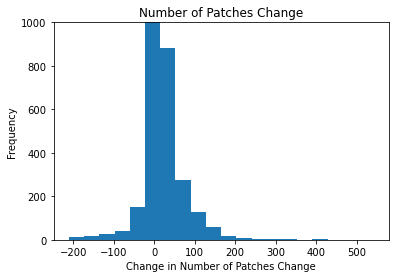

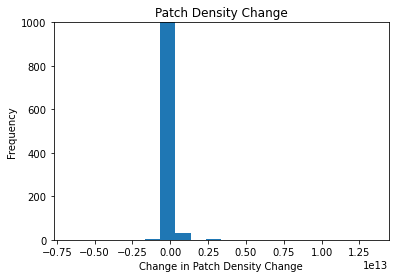

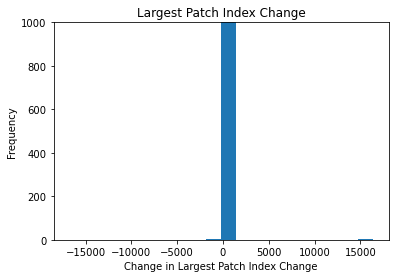

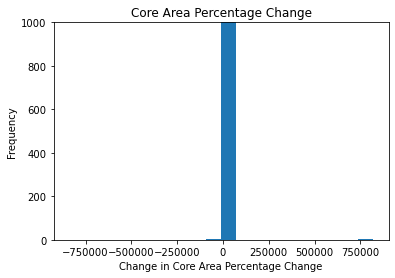

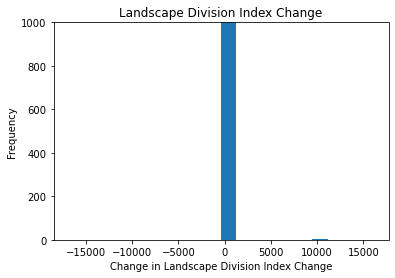

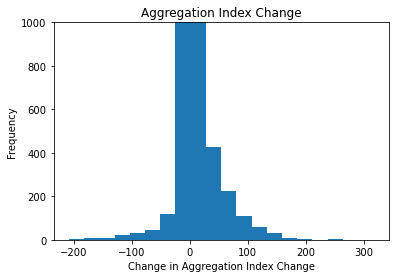

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Replace non-finite values with NaN
result_df2_changes.replace([np.inf, -np.inf], np.nan, inplace=True)

# Function to create histograms with the specified y-limit
def create_histogram(data, title):
    plt.hist(data.dropna(), bins=20)
    plt.title(title)
    plt.xlabel(f"Change in {title}")
    plt.ylabel("Frequency")
    plt.ylim(0, 1000)
    plt.show()

# Create a histogram for each metric
create_histogram(result_df2_changes['Number_of_patches_change'], "Number of Patches Change")
create_histogram(result_df2_changes['Patch_density_change'], "Patch Density Change")
create_histogram(result_df2_changes['Largest_patch_index_change'], "Largest Patch Index Change")
create_histogram(result_df2_changes['Core_area_percentage_change'], "Core Area Percentage Change")
create_histogram(result_df2_changes['Landscape_division_index_change'], "Landscape Division Index Change")
create_histogram(result_df2_changes['Aggregation_index_change'], "Aggregation Index Change")




## Fragmentation Interpretation

In [1]:
# read in the csv file C:/Users/Tristan/Desktop/africapolisTMF_forest_metrics.csv

import pandas as pd
import matplotlib.pyplot as plt
import arcpy
import os
import geopandas as gpd

# Read the csv file into a dataframe
df = pd.read_csv("C:/Users/Tristan/Desktop/africapolisTMF_forest_metrics.csv")


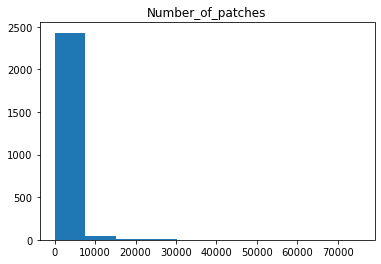

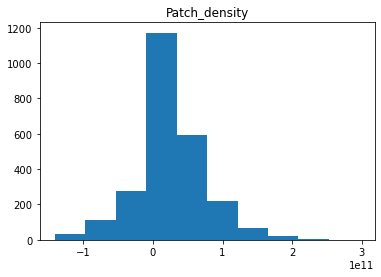

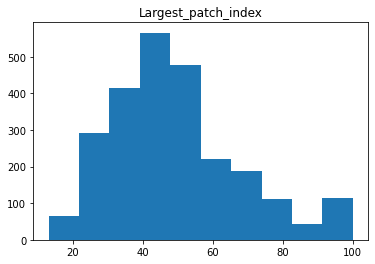

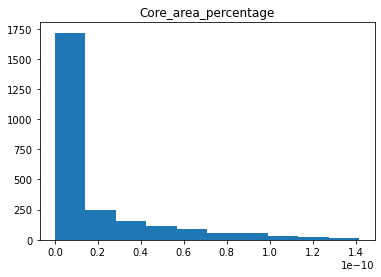

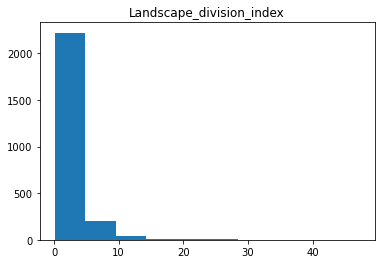

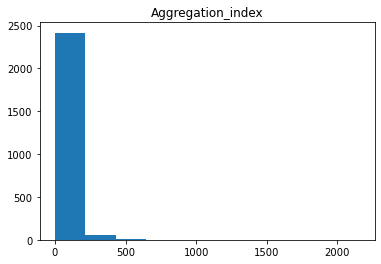

In [11]:
#group df by agglos ID and calculate the mean of each column, preserving the agglos ID as the index
df_grouped = df.groupby("agglosID").mean()

#reset the index
df_grouped = df_grouped.reset_index()

#drop the year column
df_grouped = df_grouped.drop(columns=["year"])

#create a histogram for each column except agglosID
for column in df_grouped.columns[1:]:
    plt.hist(df_grouped[column])
    plt.title(column)
    plt.show()


In [2]:
clipShapes = gpd.read_file(r"C:/Users/Tristan/Desktop/World Bank/AFRICAPOLIS2020/AFRICAPOLIS2020_JRCtmf_BBPLB_clipTMFarea_reduced2500forobs1991forest.shp")

#convert clipShapes to a dataframe
clipShapes_df = pd.DataFrame(clipShapes)


In [3]:
#join the clipShapes_df to df, only keeping the country agglosName and ISO3 columns from clipShapes in the joined dataframe and all the columns from df. Join on agglosID
df2 = df.merge(clipShapes_df[["agglosID", "agglosName", "ISO3"]], on="agglosID", how="left")

In [5]:
df_1991 = df2[df2['year'] == 1991].rename(columns={"Number_of_patches": "Number_of_patches_1991",
                                                   "Patch_density": "Patch_density_1991",
                                                   "Largest_patch_index": "Largest_patch_index_1991",
                                                   "Core_area_percentage": "Core_area_percentage_1991",
                                                   "Landscape_division_index": "Landscape_division_index_1991",
                                                   "Aggregation_index": "Aggregation_index_1991"})

df_2021 = df2[df2['year'] == 2021].rename(columns={"Number_of_patches": "Number_of_patches_2021",
                                                   "Patch_density": "Patch_density_2021",
                                                   "Largest_patch_index": "Largest_patch_index_2021",
                                                   "Core_area_percentage": "Core_area_percentage_2021",
                                                   "Landscape_division_index": "Landscape_division_index_2021",
                                                   "Aggregation_index": "Aggregation_index_2021"})

df3 = pd.merge(df_2021, df_1991, on="agglosID", how="inner")

df3["Number_of_patches_30year"] = df3["Number_of_patches_2021"] - df3["Number_of_patches_1991"]
df3["Patch_density_30year"] = df3["Patch_density_2021"] - df3["Patch_density_1991"]
df3["Largest_patch_index_30year"] = df3["Largest_patch_index_2021"] - df3["Largest_patch_index_1991"]
df3["Core_area_percentage_30year"] = df3["Core_area_percentage_2021"] - df3["Core_area_percentage_1991"]
df3["Landscape_division_index_30year"] = df3["Landscape_division_index_2021"] - df3["Landscape_division_index_1991"]
df3["Aggregation_index_30year"] = df3["Aggregation_index_2021"] - df3["Aggregation_index_1991"]

df3 = df3[["agglosID", "Number_of_patches_30year", "Patch_density_30year", "Largest_patch_index_30year",
           "Core_area_percentage_30year", "Landscape_division_index_30year", "Aggregation_index_30year"]]

#write df3 to a csv
df3.to_csv("C:/Users/Tristan/Desktop/africapolisTMF_forest_metrics_30year.csv", index=False)

In [6]:
# Load in JRC forest percentage data E:/World Bank/forobs/africapolis_buffer_forobsComplete_sumrast.csv
forest_df = pd.read_csv(r"E:/World Bank/forobs/africapolis_buffer_forobsComplete_sumrast.csv")

#filter forest_df to only the rows where the agglosID column has the same records as the agglosID column in df2
forest_df2 = forest_df[forest_df["agglosID"].isin(df2["agglosID"])]

#print all of the columns in forest_df2 without truncation
pd.set_option('display.max_columns', None)

#calculate percentforest1991 as the forest1991 column divided by the sum column multiplied by 100, do this for forest2001 and forest2021
forest_df2["percentforest1991"] = forest_df2["forest1991"] / forest_df2["sum"] * 100
forest_df2["percentforest2001"] = forest_df2["forest2001"] / forest_df2["sum"] * 100
forest_df2["percentforest2021"] = forest_df2["forest2021"] / forest_df2["sum"] * 100

#create a forestchange30year column as the percentforest2021 column minus the percentforest1991 column
forest_df2["forestchange30year"] = forest_df2["percentforest2021"] - forest_df2["percentforest1991"]

#create a forestchange20year column as the percentforest2021 column minus the percentforest2001 column
forest_df2["forestchange20year"] = forest_df2["percentforest2021"] - forest_df2["percentforest2001"]

#join the forestchange20year, forestchange30year columns to df2 on agglosID
df2 = df2.merge(forest_df2[["agglosID", "forestchange20year", "forestchange30year"]], on="agglosID", how="left")

<ipython-input-6-d8e096948136>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forest_df2["percentforest1991"] = forest_df2["forest1991"] / forest_df2["sum"] * 100
<ipython-input-6-d8e096948136>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forest_df2["percentforest2001"] = forest_df2["forest2001"] / forest_df2["sum"] * 100
<ipython-input-6-d8e096948136>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

Clustering of Change Metrics

In [7]:
#join forestchange30year to df3 on agglosID
df3 = df3.merge(df2[["agglosID", "forestchange30year"]], on="agglosID", how="left")

#keep only 1 row per agglosID in df3
df3 = df3.drop_duplicates(subset=["agglosID"]) 

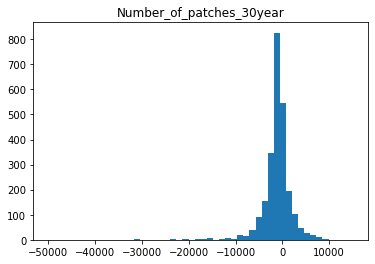

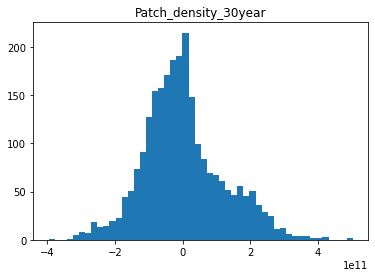

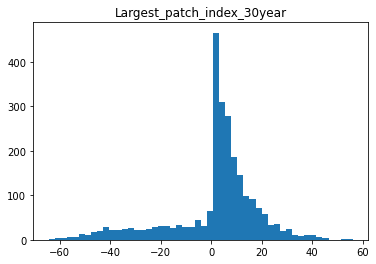

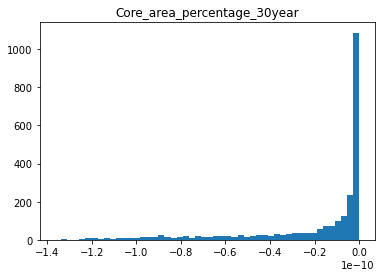

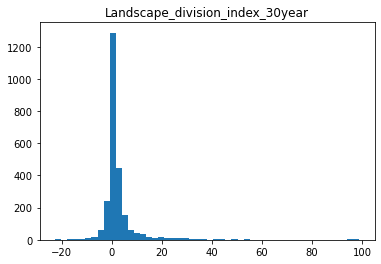

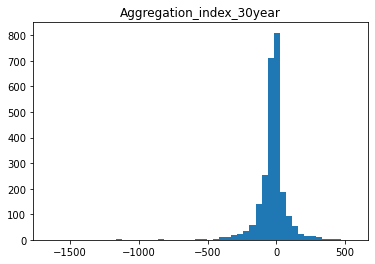

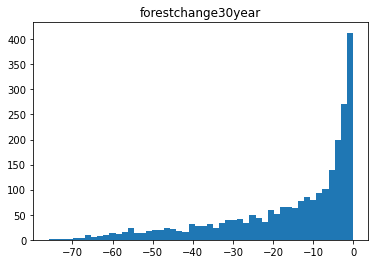

In [8]:
#create a histogram of each of the columns in df3 except for agglosID
for col in df3.columns[1:]:
    plt.title(col)
    plt.hist(df3[col], bins=50)
    plt.show()

In [ ]:
#create a cluster column in df3. Cluster 1 is where the 

Number of Patches:
Positive Change: A positive change indicates an increase in the number of patches in the landscape. This could be due to fragmentation or subdivision of the landscape, resulting in more smaller patches.
Negative Change: A negative change indicates a decrease in the number of patches. This may suggest landscape consolidation or merging of patches, resulting in larger, more connected patches.

Patch Density:
Positive Change: A positive change in patch density indicates an increase in the density or concentration of patches within the landscape. It may suggest intensified fragmentation or a more fragmented landscape pattern.
Negative Change: A negative change in patch density suggests a decrease in the density of patches. This may indicate a more contiguous or less fragmented landscape.

Largest Patch Index:
Positive Change: A positive change indicates an increase in the size or extent of the largest patch in the landscape. It suggests the dominance or expansion of a particular patch, potentially resulting in a more homogeneous landscape.
Negative Change: A negative change suggests a decrease in the size or extent of the largest patch. This may imply fragmentation or subdivision of the largest patch, resulting in a more diverse or heterogeneous landscape.

Core Area Percentage:
Positive Change: A positive change indicates an increase in the proportion or percentage of the landscape that represents core areas or the most interior parts of patches. It suggests a concentration of core habitat within the landscape.
Negative Change: A negative change suggests a decrease in the core area percentage. It may indicate a reduction in the extent of core areas or increased fragmentation of core habitat within the landscape.

Landscape Division Index:
Positive Change: A positive change indicates an increase in the degree of division or fragmentation within the landscape. It suggests a more fragmented or compartmentalized landscape pattern.
Negative Change: A negative change suggests a decrease in the landscape division. It may indicate a more connected or cohesive landscape pattern with fewer barriers or divisions between patches.

Aggregation Index:
Positive Change: A positive change indicates an increase in the aggregation or clustering of patches within the landscape. It suggests a more aggregated or clustered spatial pattern.
Negative Change: A negative change suggests a decrease in the aggregation of patches. It may indicate a more dispersed or scattered spatial arrangement of patches within the landscape.

In [112]:
#filter df2 to only those rows where forestchange30year is less than -15
df4 = df2[df2["forestchange30year"] < -15]

#print the length of df3
print(len(df4))

30511


In [75]:
#For every metric - patch_density, largest_patch_index, core_area_percentage, landscape_division_index, aggregation_index - find the slope of the linear regression line for each agglosID and save the slope in a new dataframe called df_metric_slops
#For example, for patch_density, the slope of the linear regression line for agglosID 1 is 0.0001, for agglosID 2 is 0.0002, for agglosID 3 is 0.0003, etc. Save these values in a new dataframe called df_metric_slops

import pandas as pd
import numpy as np
from scipy import stats

# Create an empty dataframe to store the results
df_metric_slopes = pd.DataFrame()

# Loop through the unique agglosIDs in the dataframe
for agglosID in df2["agglosID"].unique():
    # Get the rows for the current agglosID
    df_agglosID = df2[df2["agglosID"] == agglosID]

    # Loop through the metrics
    for metric in ["Number_of_patches", "Patch_density", "Largest_patch_index", "Core_area_percentage", "Landscape_division_index", "Aggregation_index"]:
        # Get the values for the current metric
        y = df_agglosID[metric].values
        x = df_agglosID["year"].values

        # Remove NaN values
        valid_indices = np.logical_not(np.logical_or(np.isnan(x), np.isnan(y)))
        x_valid = x[valid_indices]
        y_valid = y[valid_indices]

        # Remove outliers using Z-score
        z_scores = np.abs(stats.zscore(y_valid))
        outlier_indices = z_scores > 3  # Adjust the threshold as needed
        x_clean = x_valid[~outlier_indices]
        y_clean = y_valid[~outlier_indices]

        # Perform linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(x_clean, y_clean)

        # Create a dataframe with the results
        df_metric_slopes = df_metric_slopes.append({
            "agglosID": agglosID,
            "metric": metric,
            "slope": slope
        }, ignore_index=True)

# Print the resulting dataframe
print(df_metric_slopes)


       agglosID                    metric         slope
0          10.0         Number_of_patches -3.251290e+01
1          10.0             Patch_density -2.567507e+09
2          10.0       Largest_patch_index  8.254238e-02
3          10.0      Core_area_percentage -1.335860e-15
4          10.0  Landscape_division_index  1.139767e-01
...         ...                       ...           ...
14953    9202.0             Patch_density  1.330423e+09
14954    9202.0       Largest_patch_index -2.963993e-01
14955    9202.0      Core_area_percentage -1.221453e-12
14956    9202.0  Landscape_division_index -1.043213e-01
14957    9202.0         Aggregation_index  7.157670e-01

[14958 rows x 3 columns]


Example Country

In [80]:
#filter df2 only to ISO3 == "COD"
df_COD = df2[df2["ISO3"] == "COD"]

#print the length of df_COD
print(len(df_COD))

df_COD

15698


agglosID  year  Number_of_patches  Patch_density  Largest_patch_index  \
0          10.0  1991               1140   9.024077e+10            78.078199   
1          10.0  1992               1140   9.024077e+10            78.078199   
2          10.0  1993               1140   9.024077e+10            78.078199   
3          10.0  1994               1136   8.994068e+10            78.092566   
4          10.0  1995                826   6.627195e+10            79.137361   
...         ...   ...                ...            ...                  ...   
77233    9179.0  2017                862   8.021905e+10            55.931871   
77234    9179.0  2018                849   7.946470e+10            56.254291   
77235    9179.0  2019                764   7.237377e+10            56.934688   
77236    9179.0  2020                708   6.747229e+10            57.277132   
77237    9179.0  2021                692   6.606867e+10            57.382380   

       Core_area_percentage  Landscape_division_index  Aggregation_index  \
0              5.177302e-14                  2.312477          14.587939   
1              5.177302e-14                  2.312477          14.587939   
2              5.177302e-14                  2.312477          14.587939   
3              5.177367e-14                  2.316971          14.534034   
4              5.038133e-14                  2.753541          10.424912   
...                     ...                       ...                ...   
77233          4.625773e-13                  1.905047          15.393728   
77234          4.361425e-13                  1.930642          15.074406   
77235          4.035551e-13                  2.059825          13.401320   
77236          4.009184e-13                  2.152606          12.343495   
77237          4.006189e-13                  2.181351          12.042024   

      agglosName ISO3  
0            Aba  COD  
1            Aba  COD  
2            Aba  COD  
3            Aba  COD  
4            Aba  COD  
...          ...  ...  
77233      Zongo  COD  
77234      Zongo  COD  
77235      Zongo  COD  
77236      Zongo  COD  
77237      Zongo  COD  

[15698 rows x 10 columns]

In [81]:
#filter df_COD to only include agglosNames of Kinshasa, Mbuji-Mayi, Kananga, Lubumbashi, Mbandaka, Bukavu, Kisangani, Bunia, Tshikapa, Uvira, Kolwezi, Likasi, Kikwit

df_COD_bigCities = df_COD[df_COD["agglosName"].isin(["Kinshasa", "Mbuji-Mayi", "Kananga", "Lubumbashi", "Mbandaka", "Bukavu", "Kisangani", "Bunia", "Tshikapa", "Uvira", "Kolwezi", "Likasi", "Kikwit"])]


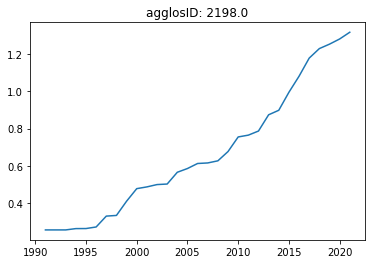

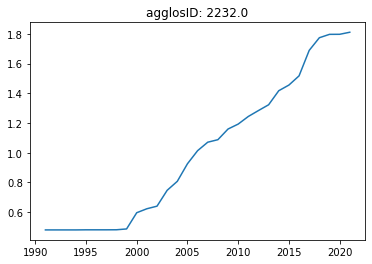

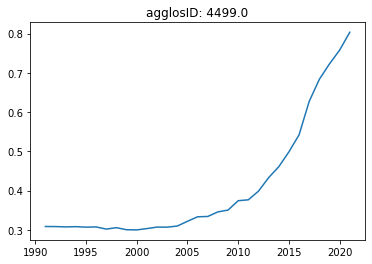

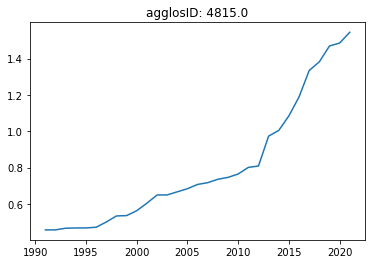

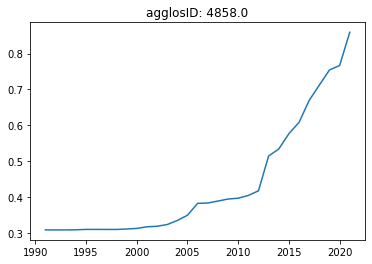

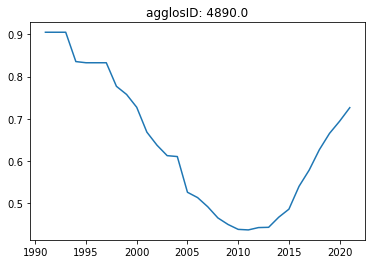

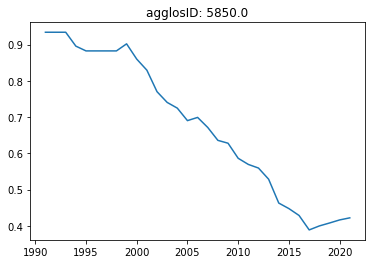

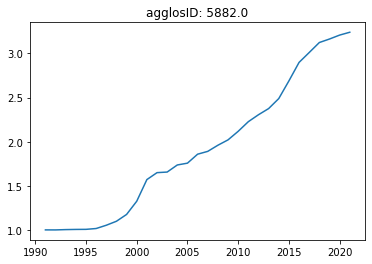

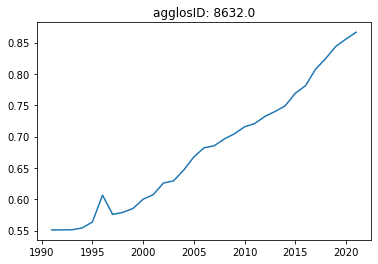

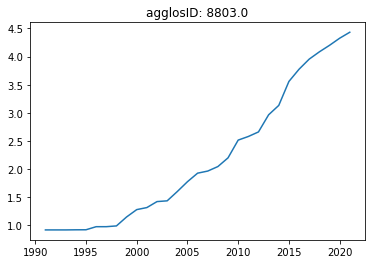

In [90]:
#plot the patch_density metric for each agglosID in df_COD_bigCities in separate plots

import matplotlib.pyplot as plt

# Loop through the unique agglosIDs in the dataframe
for agglosID in df_COD_bigCities["agglosID"].unique():
    # Get the rows for the current agglosID
    df_agglosID = df_COD_bigCities[df_COD_bigCities["agglosID"] == agglosID]

    # Get the values for the current metric
    y = df_agglosID["Landscape_division_index"].values
    x = df_agglosID["year"].values

    # Remove NaN values
    valid_indices = np.logical_not(np.logical_or(np.isnan(x), np.isnan(y)))
    x_valid = x[valid_indices]
    y_valid = y[valid_indices]

    # Remove outliers using Z-score
    #z_scores = np.abs(stats.zscore(y_valid))
    #outlier_indices = z_scores > 3  # Adjust the threshold as needed
    #x_clean = x_valid[~outlier_indices]
    #y_clean = y_valid[~outlier_indices]

    # Plot the values
    plt.plot(x_valid, y_valid)

    # Add a title
    plt.title("agglosID: " + str(agglosID))

    # Show the plot
    plt.show()



# compare forest metrics with the numpy array forest class check

In [6]:
#load in data from: C:/Users/Tristan/Desktop/africapolisTMF_forest_metrics_1numpyArrayCheck.csv
#save this data as metrics_checked

import pandas as pd

metrics_checked = pd.read_csv("C:/Users/Tristan/Desktop/africapolisTMF_forest_metrics_1numpyArrayCheck.csv")

metrics = pd.read_csv("C:/Users/Tristan/Desktop/africapolisTMF_forest_metrics.csv")

In [9]:
metrics_checked

agglosID  year  Number_of_patches  Patch_density  Largest_patch_index  \
0          10.0  1991             1138.0   2.609331e+12           128.977685   
1          10.0  1992             1138.0   2.609331e+12           128.977685   
2          10.0  1993             1138.0   2.609331e+12           128.977685   
3          10.0  1994             1134.0   2.614089e+12           129.674033   
4          10.0  1995              824.0   3.085556e+12           211.269785   
...         ...   ...                ...            ...                  ...   
77388    9202.0  2017             1490.0   5.554675e+10             1.000000   
77389    9202.0  2018             1751.0   6.744147e+10             1.000000   
77390    9202.0  2019             1830.0   7.188150e+10             1.000000   
77391    9202.0  2020             2307.0  -8.381458e+10             1.088450   
77392    9202.0  2021             2383.0  -8.123143e+10             1.104541   

       Core_area_percentage  Landscape_division_index  Aggregation_index  
0              12897.768526                  3.823345           8.815478  
1              12897.768526                  3.823345           8.815478  
2              12897.768526                  3.823345           8.815478  
3              12967.403315                  3.850760           8.737293  
4              21126.978515                  7.359932           3.895493  
...                     ...                       ...                ...  
77388            100.000000                  0.025906        1489.000000  
77389            100.000000                  0.023898        1750.000000  
77390            100.000000                  0.023376        1829.000000  
77391            108.845000                  0.022661        2118.609037  
77392            110.454112                  0.022627        2156.551672  

[77393 rows x 8 columns]

In [7]:
#print the number of records where metrics_checked["Number_of_patches"] != metrics["Number_of_patches"]
print(len(metrics_checked[metrics_checked["Number_of_patches"] != metrics["Number_of_patches"]]))

77393


In [8]:
#print the number of records where metrics_checked["Patch_density"] != metrics["Patch_density"]
print(len(metrics_checked[metrics_checked["Patch_density"] != metrics["Patch_density"]]))

77393


In [ ]:
#print the number of records where metrics_checked["Number_of_patches"] != metrics["Number_of_patches"]